In [79]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [11]:
target = pd.DataFrame(boston.target)

In [ ]:
boston.DESCR

Attribute Information (in order):
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940       - DIS      weighted distances to five Boston employment centres        - RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's


In [16]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [29]:
columns = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO', 'B','LSTAT']

In [33]:
x = pd.DataFrame(boston.data, columns = columns)
y = pd.DataFrame(boston.target, columns=['MEDV'])

In [39]:
x.shape

(506, 13)

In [40]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [459]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [41]:
x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [464]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [48]:
x.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [53]:
x.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

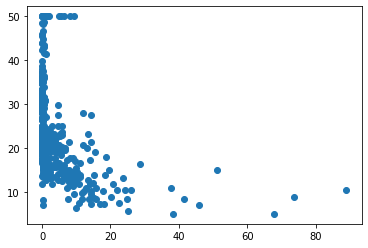

In [52]:
plt.scatter(x = x['CRIM'], y=y['MEDV'])

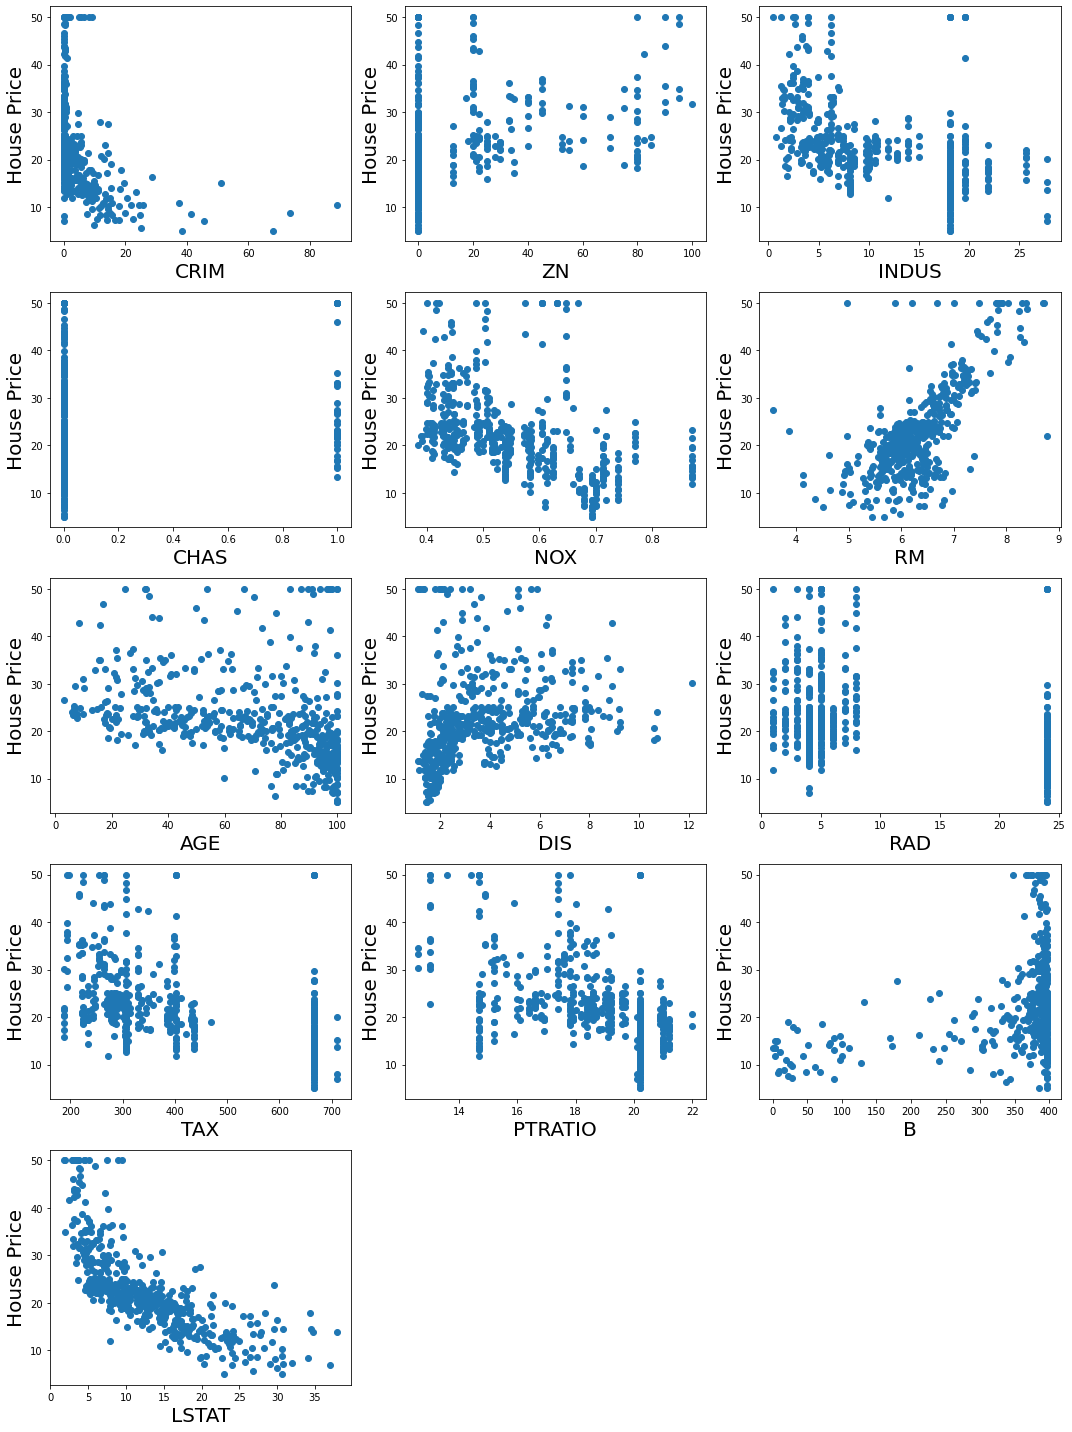

In [77]:
plt.figure(figsize=(15,20), facecolor='white')
for i, column in enumerate(columns, 1):
    ax = plt.subplot(5,3,i)
    plt.scatter(x[column], y)
    plt.xlabel(column,fontsize=20)
    plt.ylabel('House Price',fontsize=20)
plt.tight_layout()   

lets see how the data of each column is distributed

C:\Users\prudhvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prudhvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prudhvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

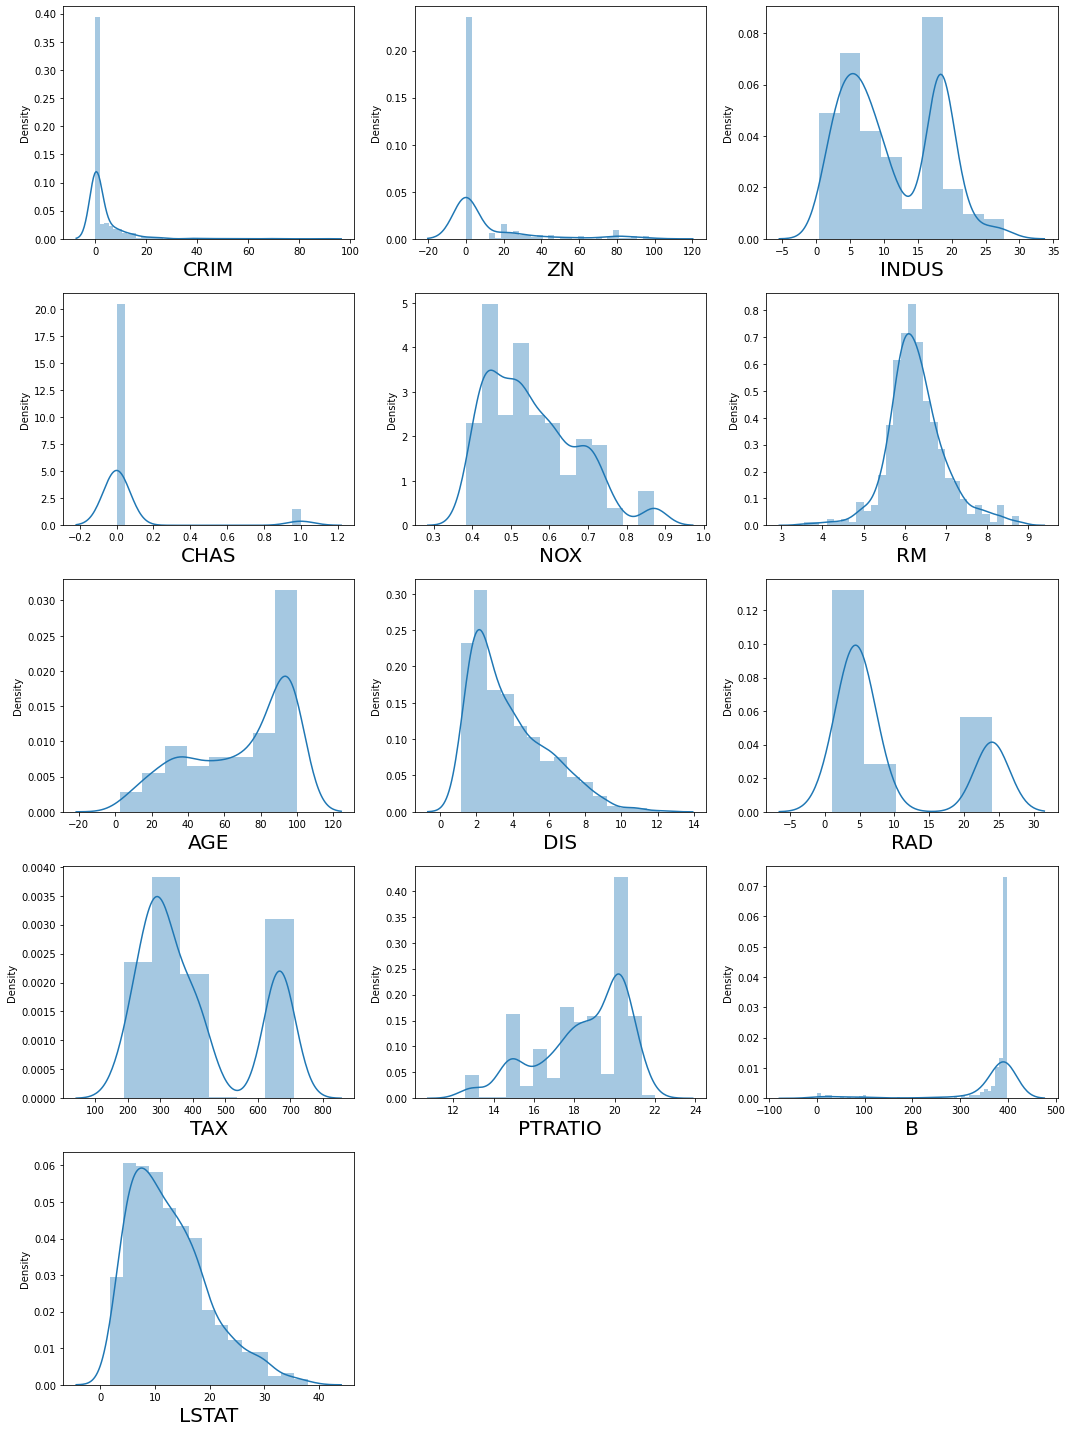

In [85]:
plt.figure(figsize=(15,20), facecolor='white')
for i, column in enumerate(columns, 1):
    ax = plt.subplot(5,3,i)
    sns.distplot(x[column])
    plt.xlabel(column,fontsize=20)
plt.tight_layout()  

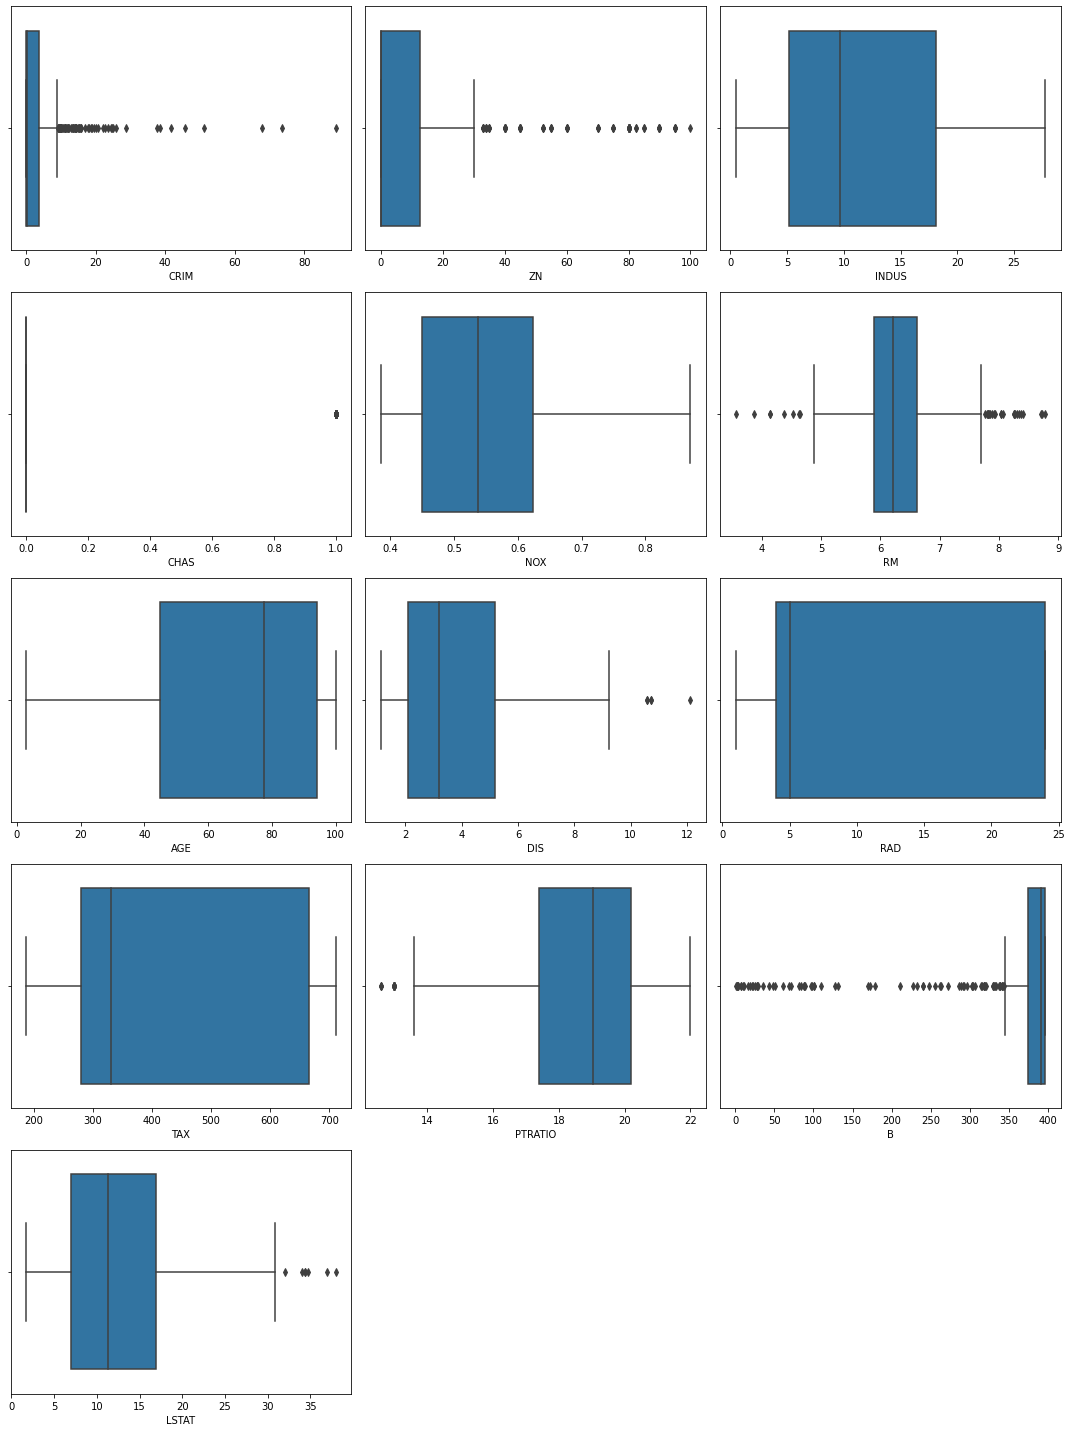

In [94]:
plt.figure(figsize=(15,20), facecolor='white')
for i, column in enumerate(columns, 1):
    ax = plt.subplot(5,3,i)
    sns.boxplot(data=x , x=x[column])
plt.tight_layout()  

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [117]:
x['CHAS'].unique() 

array([0., 1.])

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = x_scaled

vif = pd.DataFrame()
 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif["Features"] = x.columns

In [121]:
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [135]:
x_scale_drp = x.drop(['TAX'], axis=1)

In [136]:
x_scale = scaler.fit_transform(x_scale_drp)

In [139]:
variables.shape[1]

12

In [141]:
variables = x_scale
vif_drp = pd.DataFrame()
vif_drp["VIF_drp"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif_drp["Features"] = x_scale_drp.columns


In [142]:
vif_drp

,VIF_drp,Features
0,1.791940,CRIM
1,2.184240,ZN
2,3.226015,INDUS
3,1.058220,CHAS
4,4.369271,NOX
5,1.923075,RM
6,3.098044,AGE
7,3.954446,DIS
8,2.837494,RAD
9,1.788839,PTRATIO


In [236]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.3,random_state=42)

In [237]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [281]:
y_pred = pd.DataFrame(regression.predict(x_test))
y_pred

,0
0,28.780900
1,36.153559
2,17.713848
3,25.387815
4,18.846727
...,...
147,17.381601
148,13.359131
149,39.833135
150,16.626293


In [438]:
print(regression.score(x_train, y_train)) 

0.7408167656753205


In [439]:
print(regression.score(x_test, y_test))

0.6983850039833558


In [284]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [440]:
adj_r2(x_test, y_test)

0.6723462992912714

In [286]:
y_test 

,MEDV
0,23.6
1,32.4
2,13.6
3,22.8
4,16.1
...,...
147,17.1
148,14.5
149,50.0
150,14.3


In [287]:
y_test = y_test.reset_index(drop=True)

In [288]:
results = pd.DataFrame({'Actual Values' : [y_test.iloc[i,0] for i in range(y_test.shape[0])], 'Predicted Values': [y_pred.iloc[i,0] for i in range(y_pred.shape[0])] }) 

In [317]:
results.head()

,Actual Values,Predicted Values,residuals
0,23.6,28.780900,5.180900
1,32.4,36.153559,3.753559
2,13.6,17.713848,4.113848
3,22.8,25.387815,2.587815
4,16.1,18.846727,2.746727


In [316]:
results['residuals'] = abs(results['Actual Values'] - results['Predicted Values'])

In [319]:
print(regression.coef_)

[[-1.1404882   0.61158117 -0.05346716  0.84717195 -1.86839951  2.88796161
  -0.31207982 -2.87482145  1.0565843  -2.03238943  1.09320639 -3.89198185]]


In [320]:
print(regression.intercept_)

[22.50043123]


In [415]:
from sklearn.linear_model import LassoCV, Lasso, Ridge, RidgeCV, ElasticNet, ElasticNetCV
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations

alphas = np.random.uniform(low=0, high=10, size=(50,))
lasscv = LassoCV(alphas = alphas, cv =5, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

c:\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=array([1.01486   , 9.23750561, 1.08862082, 8.53026547, 3.02133784,
       2.23407457, 6.57593993, 3.22302628, 4.15474825, 7.27583019,
       5.83358026, 6.56409886, 4.99957249, 7.73377244, 6.28786128,
       0.61428748, 3.4142734 , 7.86872443, 3.98122211, 9.12571623,
       1.56379785, 6.50431968, 4.77149054, 0.38207346, 8.00363408,
       8.06296854, 2.34522633, 3.11053693, 8.07241187, 5.93399867,
       3....
       3.82305479, 0.25270542, 5.1924694 , 6.2186537 , 8.50555673,
       8.06977688, 0.6178574 , 1.20510477, 4.91812999, 8.19496232,
       8.55921395, 5.80864533, 5.17014393, 2.66158914, 3.09198217]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=100000,
        n_alphas=100, n_jobs=None, normalize=True, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [416]:
alpha = lasscv.alpha_
alpha

0.25270541738988794

In [417]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.25270541738988794, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [418]:
lasso_reg.score(x_train, y_train)

0.7244648716089366

In [442]:
lasso_reg.score(x_test, y_test)

0.674929313515021

In [444]:
adj_r2(x_test,y_test)

0.6723462992912714

In [433]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

c:\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([8.56644488, 6.65665019, 2.46825837, 9.0881566 , 1.74047378,
       6.90917617, 3.88068669, 4.97048645, 7.72414491, 0.53468045,
       5.86722649, 5.79576225, 3.14674257, 8.71926837, 2.04728534,
       1.24468859, 8.44761049, 6.82015761, 8.2536314 , 9.40824182,
       6.90295814, 4.57784725, 9.20607153, 5.94805502, 5.89295566,
       1.87034946, 5.14972083, 6.54077128, 0.64156718, 0.5233635 ,
       7.0197084 , 2.5812898 , 0.54554715, 2.50723919, 1.09634214,
       6.12389341, 0.92767382, 2.69388322, 6.90223775, 0.83302521,
       5.0343761 , 4.09868062, 1.53979044, 1.85760526, 8.81220306,
       6.2858149 , 1.31070323, 7.52554647, 3.35990851, 9.86831208]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [434]:
ridgecv.alpha_

0.5233634964662925

In [435]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.5233634964662925, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [445]:
ridge_model.score(x_train, y_train)

0.7408142928833991

In [446]:
ridge_model.score(x_test, y_test)

0.6983959122817208

In [462]:
ridge_model.coef_

array([[-1.13524597,  0.60660537, -0.05719385,  0.84829432, -1.84958044,
         2.88993157, -0.3129796 , -2.85521486,  1.0443916 , -2.02665057,
         1.09158969, -3.88470545]])

In [447]:
adj_r2(x_test, y_test)

0.6723462992912714

In [448]:

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

c:\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [449]:
elasticCV.alpha_

0.04566871695688524

In [450]:
elasticCV.l1_ratio

0.5

In [451]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.04566871695688524, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [452]:
elasticnet_reg.score(x_test, y_test)

0.6970993321578577

In [453]:
adj_r2(x_test, y_test)

0.6723462992912714

In [454]:
elasticnet_reg.score(x_train, y_train)

0.7397409385511315

In [456]:
# saving the model to the local file system
import pickle
filename = 'finalized_model.pickle'
pickle.dump(ridge_model, open(filename, 'wb'))

In [465]:
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03]]))
a

array([[30.8861369]])